<h1><center> Chebyshev expansions

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%config InlineBackend.figure_format = 'retina'

In [77]:
HTML('''
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">[Toggle Code]</a>
''')

<h3> Chebyshev interpolation </h3>

$$
\begin{bmatrix}
    T_0(x_0)     & T_0(x_1) & T_0(x_2) & \dots & T_0(x_n) \\
    T_1(x_0)     & T_1(x_1) & T_1(x_2) & \dots & T_1(x_n) \\
    \dots        & \dots    & \dots    & \dots & \dots    \\
    T_2(x_0)     & T_2(x_1) & T_2(x_2) & \dots & T_2(x_n)
\end{bmatrix}
\begin{bmatrix}
   a_0\\
   a_1 \\
   \vdots \\
   a_n
\end{bmatrix}
=
\begin{bmatrix}
   f(x_0)\\
   f(x_1)\\
   \vdots \\
   f(x_n)
\end{bmatrix}
$$

where $a_0, a_1, etc$ are the Chebyshev coefficients. Using $x = cos(\theta)$, we get
$$
\begin{bmatrix}
    1     & 1 & 1 & \dots & 1 \\
    cos(\theta_0)     & cos(\theta_1) & cos(\theta_2) & \dots & cos(\theta_n) \\
    \dots        & \dots    & \dots    & \dots & \dots    \\
    cos(n\theta_0)     & cos(n\theta_1) & cos(n\theta_2) & \dots & cos(n\theta_n)
\end{bmatrix}
\begin{bmatrix}
   a_0\\
   a_1 \\
   \vdots \\
   a_n
\end{bmatrix}
=
\begin{bmatrix}
   f(cos(\theta_0))\\
   f(cos(\theta_1))\\
   \vdots \\
   f(cos(\theta_n))
\end{bmatrix}
$$

The number of interpolation points is 30.

In [61]:
# Interpolation points linearly spaced b/w 0 an pi
N = 30

theta = np.linspace(0,1,N)*np.pi
x = np.cos(theta)

In [63]:
# Chebyshev Matrix with coordinate transformation
# x = cos(theta)
M = np.ones((N,N))

for i in range(N):
    for j in range(N):
        M[i,j] = np.cos(i*theta[j])

<h3> Test for $f(x) = x^n$

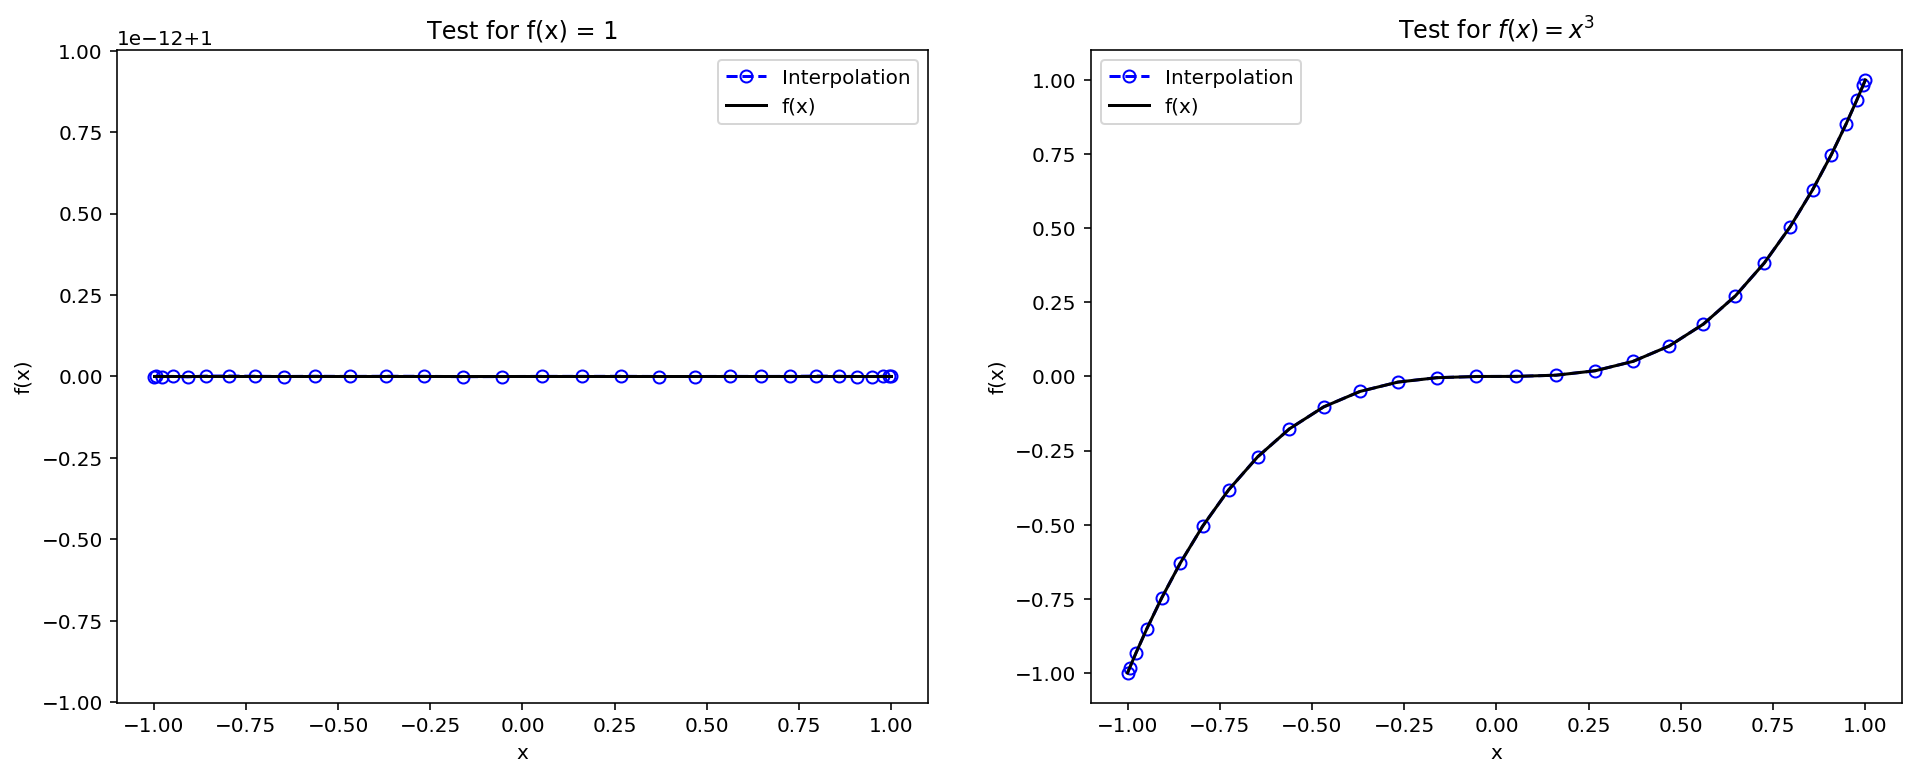

In [66]:
# Test
f_Test = lambda x,n: x**n

a1_Test = np.dot(np.linalg.inv(M),f_Test(x,0))
a2_Test = np.dot(np.linalg.inv(M),f_Test(x,3))
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(x, np.dot(M,a1_Test), 'o--', color='blue', mfc='none', label='Interpolation')
ax1.plot(x, f_Test(x,0), color='black', mfc='none', label='f(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Test for f(x) = 1')
ax1.legend()
ax2 = fig.add_subplot(122)
ax2.plot(x, np.dot(M,a2_Test), 'o--', color='blue', mfc='none', label='Interpolation')
ax2.plot(x, f_Test(x,3), color='black', mfc='none', label='f(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Test for $f(x) = x^3$')
plt.legend()
plt.show()

<h3> (i) $f(x) = \sqrt{(1-x^2)}$

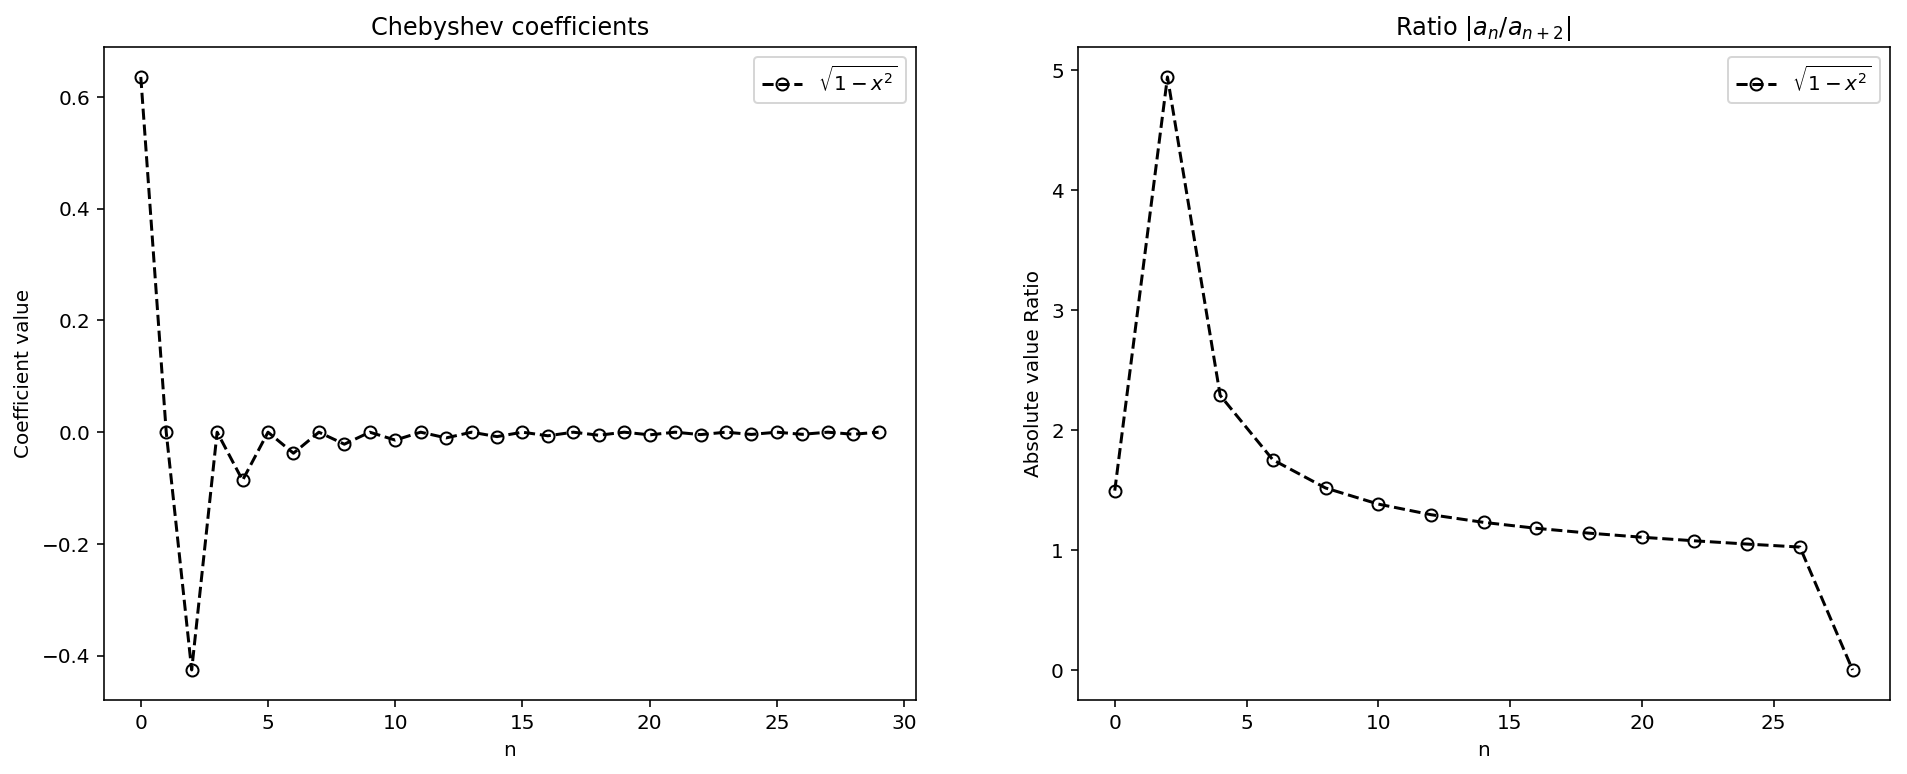

In [67]:
# Function f(x)
f1 = lambda x: np.sqrt(1 - x**2)

#a_n1 = np.dot(np.linalg.inv(M),f1(x))
a_n1 = np.dot(np.linalg.inv(M),f1(x))
# odd coefficients are zero
# only even coefficients
a_neven = a_n1[np.nonzero(np.round(a_n1,12))]

a_r1 = np.zeros((len(a_neven)))
for i in range(len(a_neven)-1):
    a_r1[i] = np.abs(a_neven[i]/a_neven[i+1])

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(N), a_n1, 'o--', color='black', mfc='none', label='$\sqrt{1-x^2}$')
ax1.set_xlabel('n')
ax1.set_ylabel('Coefficient value')
ax1.set_title('Chebyshev coefficients')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(len(a_neven))*2, a_r1, 'o--', color='black', mfc='none', label='$\sqrt{1-x^2}$')
ax2.set_xlabel('n')
ax2.set_ylabel('Absolute value Ratio')
ax2.set_title('Ratio $|a_{n}/a_{n+2}|$')
plt.legend()

plt.show()

<h3> (ii) $f(x) = \frac{1+x}{1+x^2}$

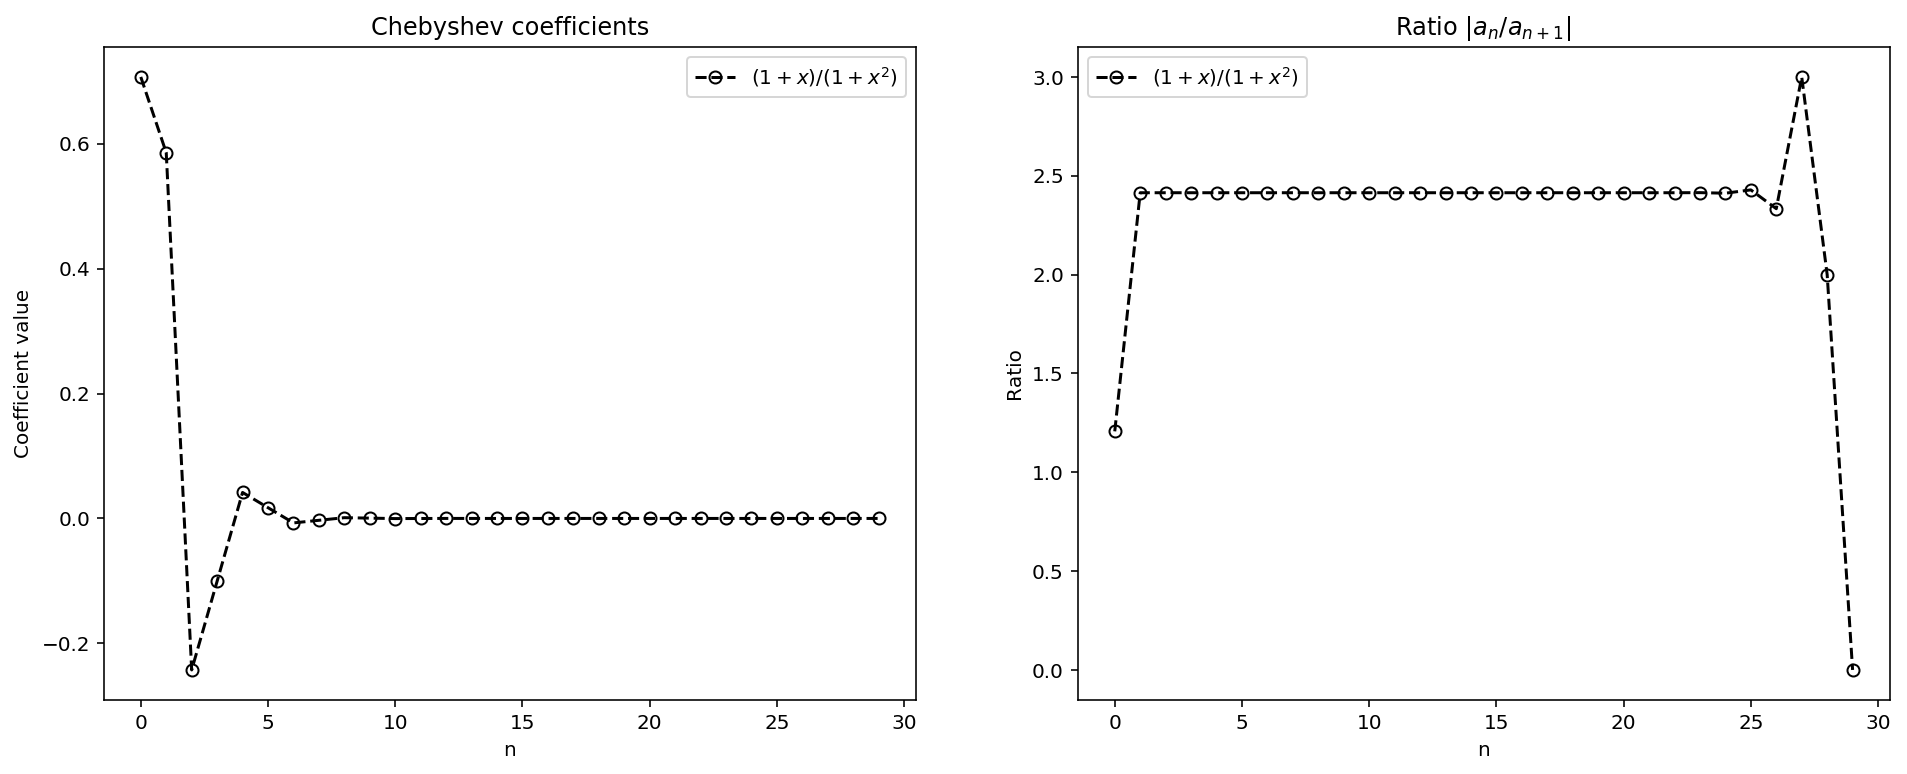

In [72]:
# Function f(x)
f2 = lambda x: (1+x)/(1+x**2)

# Chebyshev coefficients
a_n2 = np.dot(np.linalg.inv(M),f2(x))
a_r2 = np.zeros((N))

# Ratio of coefficients
for i in range(N-1):
    a_r2[i] = np.abs(a_n2[i]/a_n2[i+1])

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(N), a_n2, 'o--', color='black', mfc='none', label='$(1+x)/(1+x^2)$')
ax1.set_xlabel('n')
ax1.set_ylabel('Coefficient value')
ax1.set_title('Chebyshev coefficients')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(N), a_r2, 'o--', color='black', mfc='none', label='$(1+x)/(1+x^2)$')
ax2.set_xlabel('n')
ax2.set_ylabel('Ratio')
ax2.set_title('Ratio $|a_{n}/a_{n+1}|$')
plt.legend()

plt.show()

<h3> (iii) $f(x) = e^{-x}$

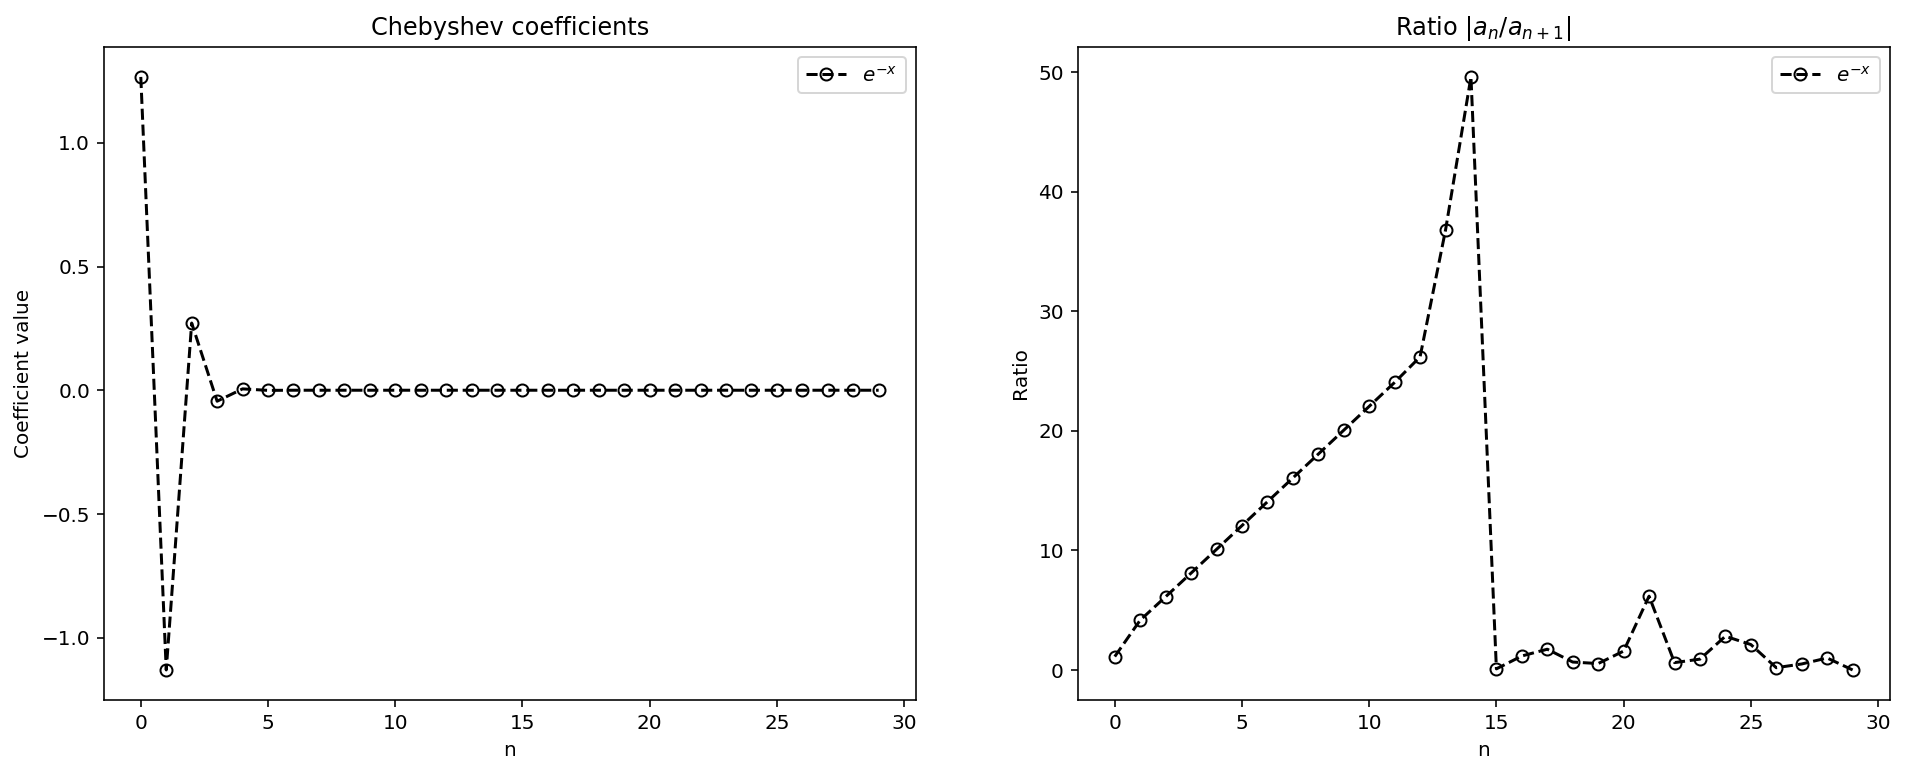

In [73]:
# Function f(x)
f3 = lambda x: np.exp(-x)

# Chebyshev coefficients
a_n3 = np.dot(np.linalg.inv(M),f3(x))
a_r3 = np.zeros((N))

# Ratio of coefficients
for i in range(N-1):
    a_r3[i] = np.abs(a_n3[i]/a_n3[i+1])

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(N), a_n3, 'o--', color='black', mfc='none', label='$e^{-x}$')
ax1.set_xlabel('n')
ax1.set_ylabel('Coefficient value')
ax1.set_title('Chebyshev coefficients')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(N), a_r3, 'o--', color='black', mfc='none', label='$e^{-x}$')
ax2.set_xlabel('n')
ax2.set_ylabel('Ratio')
ax2.set_title('Ratio $|a_{n}/a_{n+1}|$')
plt.legend()

plt.show()

<h3> (iv) $f(x) = e^{\frac{-1}{x+1}}$

/Users/prith/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


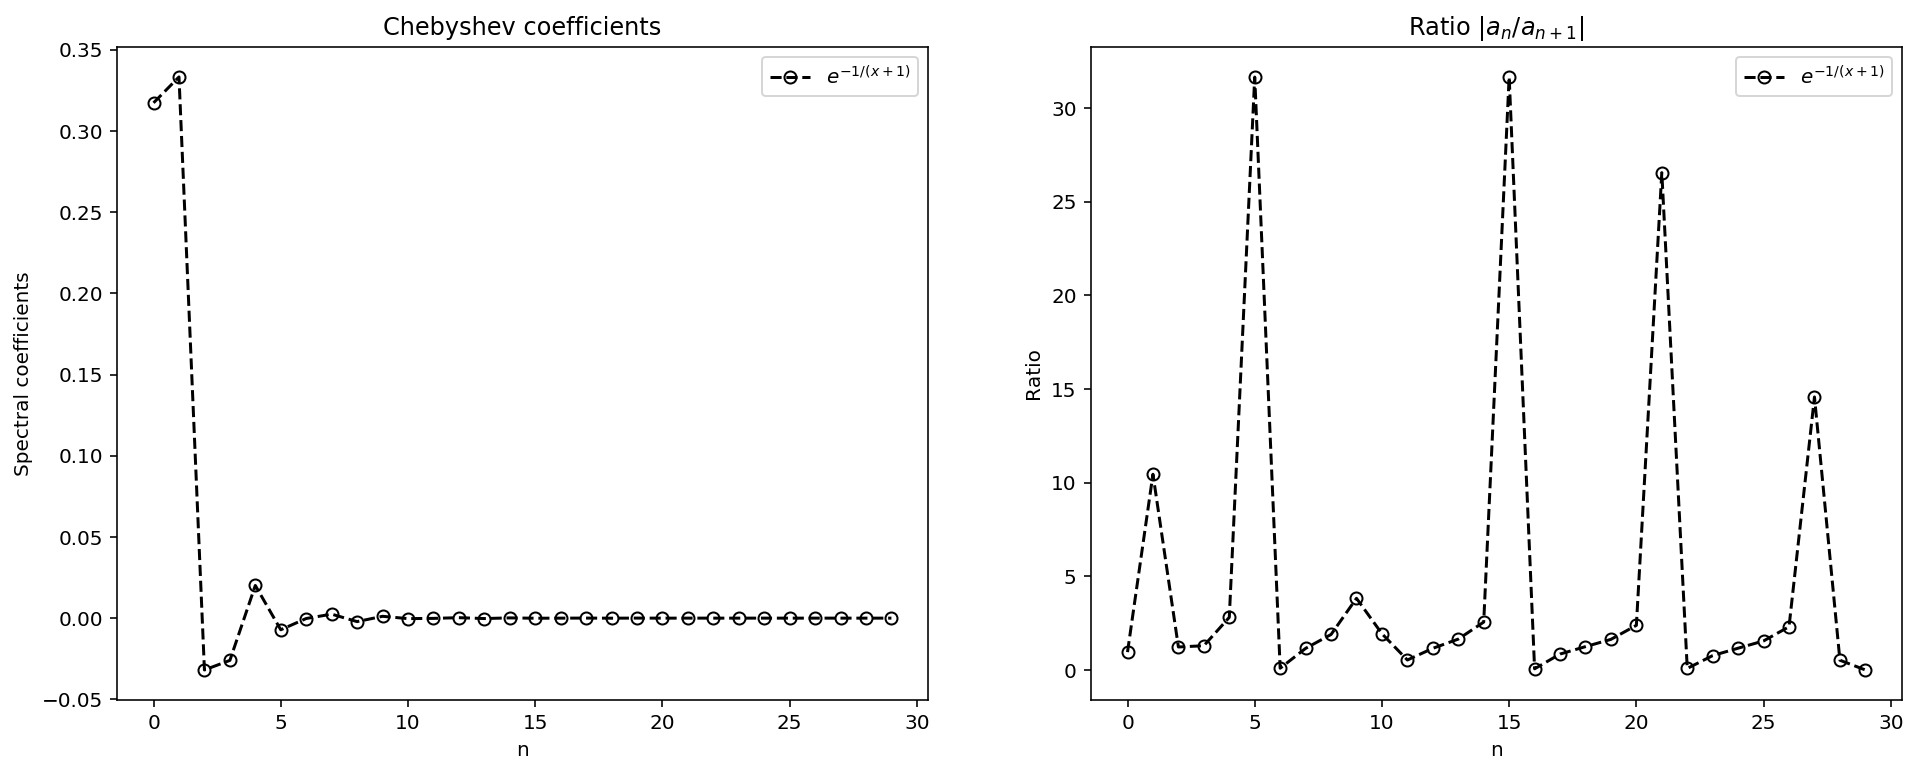

In [74]:
# Function f(x)
f4 = lambda x: np.exp(-1/(x+1))

# Chebyshev coefficients
a_n4 = np.dot(np.linalg.inv(M),f4(x))
a_r4 = np.zeros((N))

# Ratio of coefficients
for i in range(N-1):
    a_r4[i] = np.abs(a_n4[i]/a_n4[i+1])

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(N), a_n4, 'o--', color='black', mfc='none', label='$e^{-1/(x+1)}$')
ax1.set_xlabel('n')
ax1.set_ylabel('Spectral coefficients')
ax1.set_title('Chebyshev coefficients')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(N), a_r4, 'o--', color='black', mfc='none', label='$e^{-1/(x+1)}$')
ax2.set_xlabel('n')
ax2.set_ylabel('Ratio')
ax2.set_title('Ratio $|a_{n}/a_{n+1}|$')
plt.legend()

plt.show()

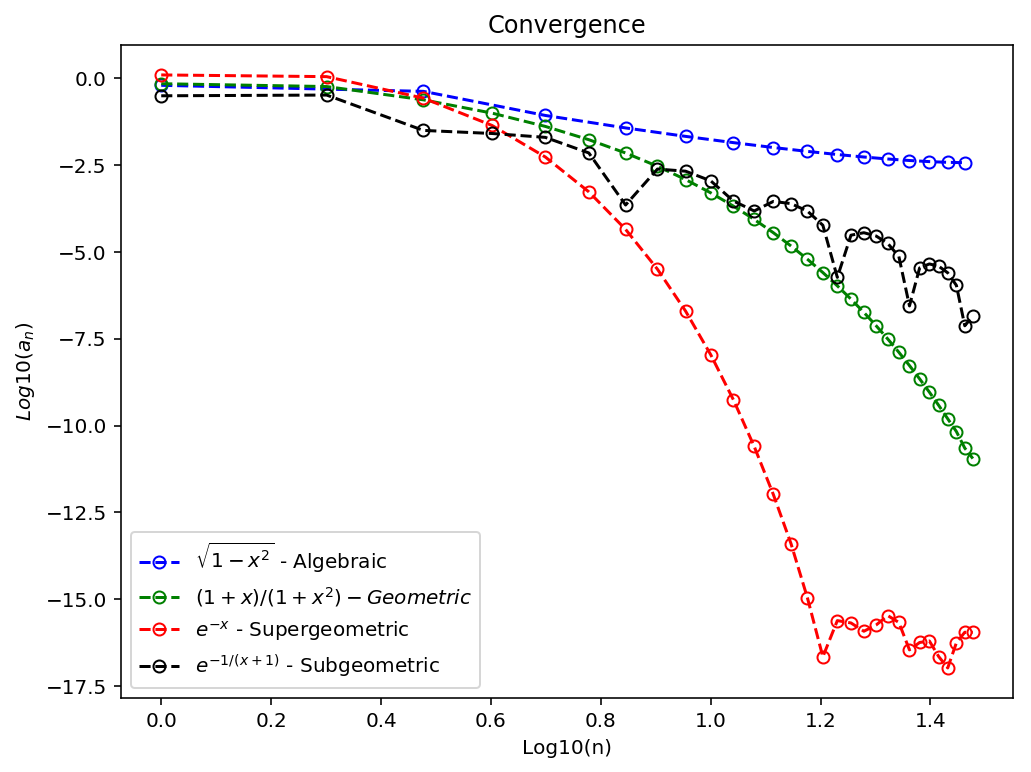

In [75]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

logn = np.log10(np.arange(N)+1)
logn2 = np.log10(np.arange(len(a_neven))*2+1)

ax1.plot(logn2, np.log10(np.abs(a_neven)), 'o--', color='blue', mfc='none', label='$\sqrt{1-x^2}$ - Algebraic')
ax1.plot(logn, np.log10(np.abs(a_n2)), 'o--', color='green', mfc='none', label='$(1+x)/(1+x^2) - Geometric$')
ax1.plot(logn, np.log10(np.abs(a_n3)), 'o--', color='red', mfc='none', label='$e^{-x}$ - Supergeometric')
ax1.plot(logn, np.log10(np.abs(a_n4)), 'o--', color='black', mfc='none', label='$e^{-1/(x+1)}$ - Subgeometric')
ax1.set_xlabel('Log10(n)')
ax1.set_ylabel('$Log10(a_n)$')
ax1.set_title('Convergence')
plt.legend()
plt.show()